In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import sys
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle


In [ ]:
import kaggle


In [ ]:
! kaggle competitions download -c dogs-vs-cats


 99% 802M/812M [00:11<00:00, 143MB/s]
100% 812M/812M [00:11<00:00, 73.5MB/s]


In [ ]:
! unzip dogs-vs-cats.zip




Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
! unzip -q train.zip

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [ ]:
conv= VGG16(weights='imagenet',
            include_top=False,
            input_shape=(150,150,3))

In [ ]:
conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
del model

In [ ]:
model =tf.keras.Sequential()
model.add(conv)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', name="h1")) # Name the layer here
model.add(tf.keras.layers.Dense(64, activation='relu', name="h2"))  # Name the layer here
model.add(tf.keras.layers.Dense(32, activation='relu', name="h3"))  # Name the layer here
model.add(tf.keras.layers.Dense(2, activation='softmax', name="output")) # Name the layer here

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 h1 (Dense)                  (None, 128)               1048704   
                                                                 
 h2 (Dense)                  (None, 64)                8256      
                                                                 
 h3 (Dense)                  (None, 32)                2080      
                                                                 
 output (Dense)              (None, 2)                 66        
                                                                 
Total params: 15773794 (60.17 MB)
Trainable params: 15

In [ ]:
conv.trainable = False     #freezing vgg16 becuse it is all ready train so need to train again vgg16

In [ ]:
! mkdir images
!mkdir images/cats
! mkdir images/dogs

mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘images/cats’: File exists
mkdir: cannot create directory ‘images/dogs’: File exists


In [ ]:
import shutil
import os # Import the os module
from tqdm import tqdm # Import the tqdm module

source="train/"
ds_cat="images/cats/"
ds_dog="images/dogs/"

for i in tqdm(os.listdir(source)):
  if i.startswith("cat"):
    shutil.copy (source+i,ds_cat)
  else:
    shutil.copy(source+i,ds_dog)

100%|██████████| 25000/25000 [00:08<00:00, 2993.95it/s]


In [ ]:
# creating img data generater
idg=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0 ,
                                                    validation_split=0.2)

In [ ]:
# gobaly setting batch size
batch_size=28

In [ ]:
# training
train_idg=idg.flow_from_directory("images",
                              target_size=(150,150),
                              batch_size=batch_size,
                              subset="training")

Found 20000 images belonging to 2 classes.


In [ ]:
valdat_idg=idg.flow_from_directory("images",
                                   target_size=(150,150),
                                batch_size=batch_size,
                                subset="validation")

Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=["accuracy"]
             )

In [ ]:
model.fit(train_idg,
          batch_size=batch_size,
          epochs=10,
          validation_data=valdat_idg)

Epoch 1/10
715/715 [==============================] - 60s 83ms/step - loss: 0.2798 - accuracy: 0.8784 - val_loss: 0.2490 - val_accuracy: 0.8928
Epoch 2/10
715/715 [==============================] - 59s 83ms/step - loss: 0.2537 - accuracy: 0.8918 - val_loss: 0.3047 - val_accuracy: 0.8652
Epoch 3/10
715/715 [==============================] - 61s 85ms/step - loss: 0.2368 - accuracy: 0.8992 - val_loss: 0.2289 - val_accuracy: 0.9040
Epoch 4/10
715/715 [==============================] - 59s 83ms/step - loss: 0.2281 - accuracy: 0.9031 - val_loss: 0.2508 - val_accuracy: 0.8914
Epoch 5/10
715/715 [==============================] - 68s 96ms/step - loss: 0.2171 - accuracy: 0.9093 - val_loss: 0.2205 - val_accuracy: 0.9044
Epoch 6/10
715/715 [==============================] - 59s 83ms/step - loss: 0.2110 - accuracy: 0.9110 - val_loss: 0.2235 - val_accuracy: 0.9062
Epoch 7/10
715/715 [==============================] - 59s 82ms/step - loss: 0.2038 - accuracy: 0.9130 - val_loss: 0.2404 - val_accuracy:

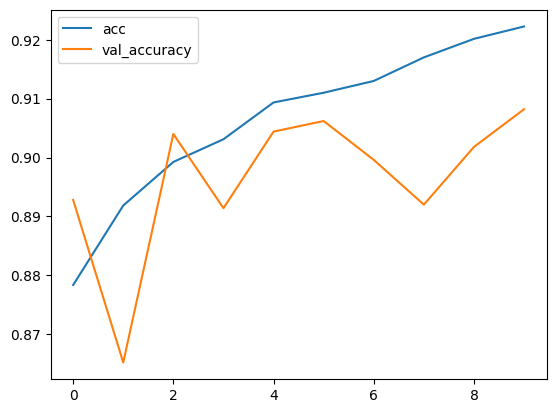

In [ ]:
plt.plot(model.history.history['accuracy'],label="acc")
plt.plot(model.history.history['val_accuracy'],label="val_accuracy")
plt.legend()